In [1]:
%load_ext autoreload
%autoreload 2
from WST import WST
import os

In [2]:
# extract the name of the file
col_group = ['Date', 'Class', 'Stress_weight', 'Position']
file_name = '10_SG_SVN/CARS'
path = os.path.join(os.path.abspath(os.getcwd()), file_name)
c = WST(path, MAX_COMPONENTS=10, col_group=col_group, cutoff=0.5)

Training/Testing split: 70.0% training, 30.0% testing
Training samples: 137
Testing samples: 59

Train/Test split by Class and Stress_weight:
  Class Controlled (C), Stress_weight 20: 22 train, 10 test
  Class Controlled (C), Stress_weight 40: 22 train, 9 test
  Class Controlled (C), Stress_weight 60: 22 train, 9 test
  Class Stressed Water (W), Stress_weight 20: 24 train, 10 test
  Class Stressed Water (W), Stress_weight 40: 24 train, 11 test
  Class Stressed Water (W), Stress_weight 60: 23 train, 10 test


In [3]:
c.compute_survived_wavelengths_best_score()
c.plot_survived_df

,Wavelengths,count
0,400.000,20.0
1,401.000,24.0
2,402.000,14.0
3,403.000,14.0
4,404.000,10.0
...,...,...
2096,2496.000,29.0
2097,2497.000,30.0
2098,2498.000,22.0
2099,2499.000,26.0


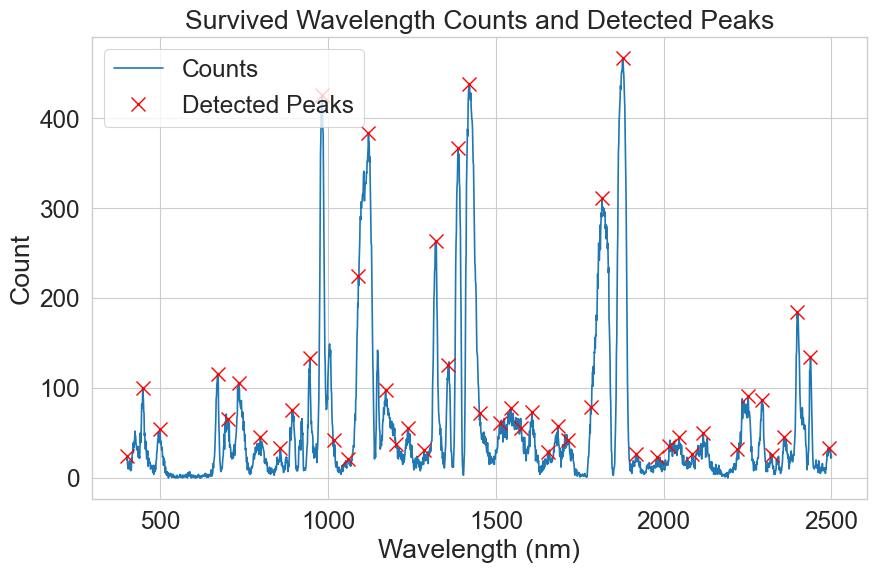

Peak-detected indices using SciPy: [1478, 1021, 581, 720, 987, 1416, 922, 690, 1998, 2037, 545, 957, 272, 333, 47, 771, 1852, 1892, 1382, 1144, 493, 1207, 1052, 302, 1112, 1284, 1176, 837, 99, 1718, 1958, 398, 1646, 1315, 616, 803, 1616, 457, 2094, 1819, 885, 1254, 1517, 1685, 1923, 1, 1580, 660]

Total combinations to test: 1

Combination 0: ['401.000', '447.000', '499.000', '672.000', '702.000', '733.000', '798.000', '857.000', '893.000', '945.000', '981.000', '1016.000', '1060.000', '1090.000', '1120.000', '1171.000', '1203.000', '1237.000', '1285.000', '1322.000', '1357.000', '1387.000', '1421.000', '1452.000', '1512.000', '1544.000', '1576.000', '1607.000', '1654.000', '1684.000', '1715.000', '1782.000', '1816.000', '1878.000', '1917.000', '1980.000', '2016.000', '2046.000', '2085.000', '2118.000', '2219.000', '2252.000', '2292.000', '2323.000', '2358.000', '2398.000', '2437.000', '2494.000']
Number of wavelengths: 48
Accuracy: 0.81, Recall: 0.81, Precision: 0.83, Specifity: 0.82,

In [4]:
a, w, y_pred = c.accuracy_survived_wavelenghts(thr=None, rdm=False, all=False, model_type='PLS', wavelengths=None, learning_curve=False, pls_plot=False, peak_detection=True, peak_distance=30, peak_height=20, confusion_matrix_f=True)

import numpy as np
import pandas as pd

# Step 1: Find indices where predictions differ from true values
diff_indices = np.where(y_pred != c.y_test.flatten())[0]

# Step 2: Get the correct class values from c.y_test
correct_classes = c.y_test[diff_indices]

# Step 3: Get the corresponding Stress_weight values from the test index
stress_weights = list(c.index_testing.get_level_values('Stress_weight')[diff_indices])

# If you want to print or return the results
print("Mismatched indices:", diff_indices)
print("Correct class values:", correct_classes)
print("Corresponding Stress_weight values:", stress_weights)

In [5]:
for i in w:
    print(len(i))
    c.permutation_test(wavelengths=i)

48
